In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [73]:
import numpy as np

from lint.models import Bucket

def plot_bootstrap(token, w=8, h=8):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    plt.figure(figsize=(w, h))

    plt.plot(bs.mean(0))

    plt.fill_between(
        range(100),
        bs.mean(0) + 2*bs.std(0),
        bs.mean(0) - 2*bs.std(0),
        color='black',
        alpha=0.1,
    )
    
    plt.plot(series)
    
    print(token)
    plt.show()

a


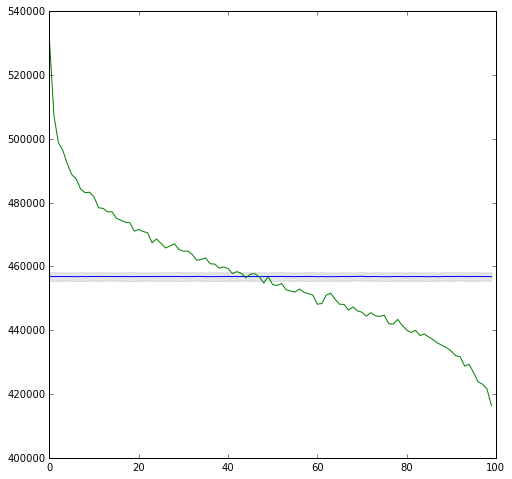

In [74]:
plot_bootstrap('a')

In [35]:
def offset_zscore(token, offset):
    
    series = Bucket.token_series(token)
    
    expected = series.sum() / len(series)

    bs = bootstrap(np.full(len(series), expected))
    
    return (series[offset] - expected) / bs[:,offset].std()

In [52]:
offset_zscore('said', 50)

7.945595856725669

In [53]:
from joblib import Memory

from lint.models import Bucket

mem = Memory('cache')

token_counts = mem.cache(Bucket.token_counts)

tokens = token_counts(10000)

________________________________________________________________________________
[Memory] Calling lint.models.bucket.token_counts...
token_counts(10000)
_________________________________________________token_counts - 1051.9s, 17.5min


In [54]:
data = []
for i, (token, count) in enumerate(tokens.items()):
    
    score = offset_zscore(token, 50)
    
    data.append((token, count, score))
        
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


In [55]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'score'))

df.sort_values('score', ascending=False, inplace=True)

In [76]:
pd.set_option('display.max_rows', 1000)

df.head(50)

token     count      score
8             “  36205440  16.313502
61           ?”   5695581  12.198142
7             i  36733423  12.151407
24           .”  14227808  11.778098
18          she  19381716  11.280200
9257        xvi     12906  10.921219
9             ’  35361460  10.735519
15          you  23542825  10.578210
8379        xiv     14889  10.124158
34            t  10147702   9.961696
9177         xv     13073   9.094918
68           do   4938855   8.981926
8711       xiii     14082   8.845155
36         said   9404296   8.204351
13         that  25428472   8.154930
95          don   2975660   7.596887
278          de    824696   7.447645
106         any   2646691   7.087481
58            ?   5940381   7.071525
5961     roland     23524   6.939857
30          not  12059627   6.774071
51         what   6623401   6.642754
277          .’    841558   6.565533
8342        xii     14967   6.421296
10239      xvii     11174   6.351343
10333     missy     11012   6.346156
5495      lance     25981   6.273011
62            '   5575886   6.266612
79        about   4267866   6.188855
4455       jeff     34239   6.163243
10376     carlo     10930   6.091296
1545        dat    121558   6.020359
9292         lu     12835   6.001019
7822      caleb     16450   5.966622
5045       shan     29085   5.963674
1605       ruth    116668   5.927964
37           ,”   9393975   5.874401
4338     gerald     35208   5.822111
3552   lawrence     45657   5.768035
159         why   1788528   5.745529
117       think   2418204   5.726688
8061      rosie     15690   5.722375
6401     dennis     21418   5.707583
7838   madeline     16396   5.663952
10943     glenn     10136   5.648384
9844       doug     11794   5.646050
227        miss   1200708   5.640616
10499     xviii     10737   5.635527
118           ‘   2402488   5.604902
55           if   6346090   5.548885

“


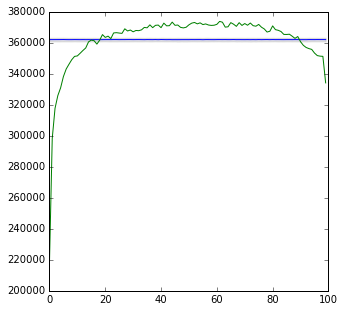

?”


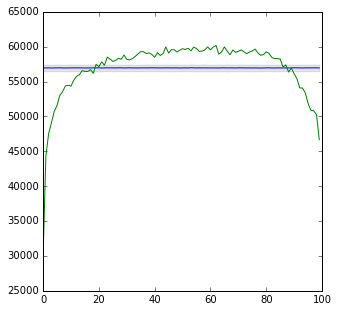

i


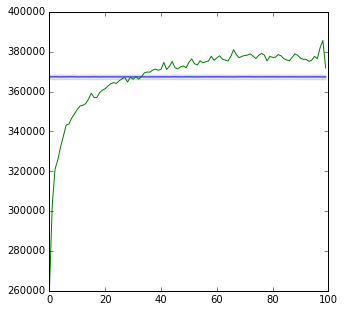

.”


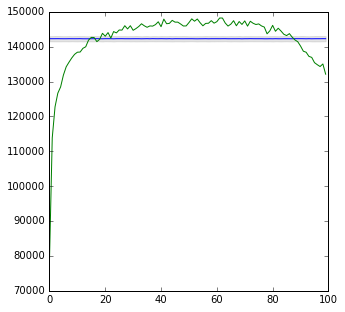

she


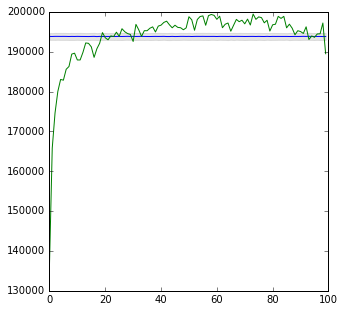

xvi


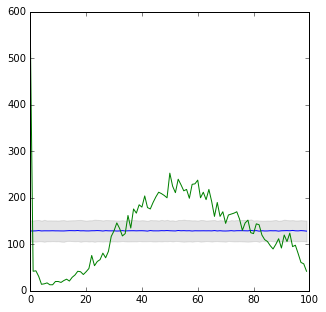

’


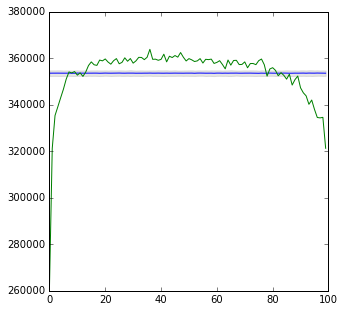

you


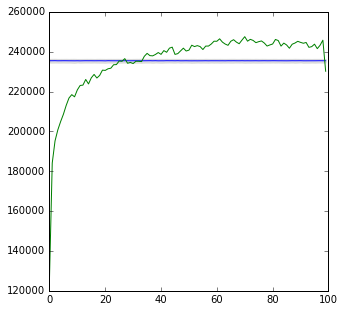

xiv


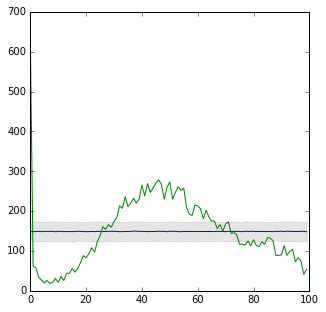

t


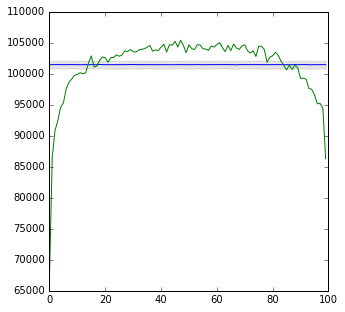

xv


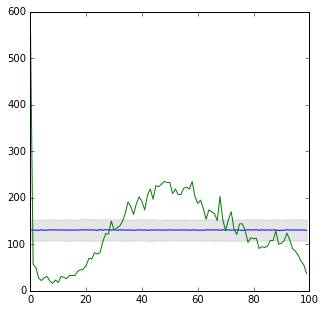

do


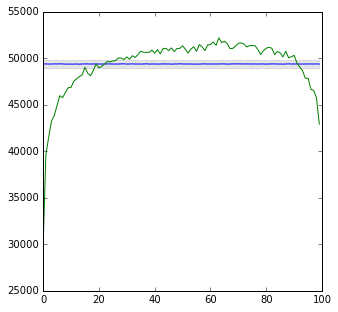

xiii


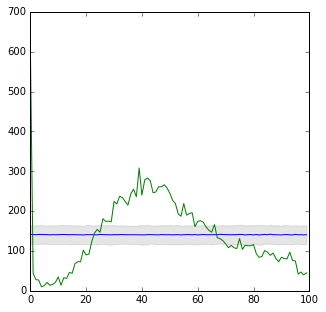

said


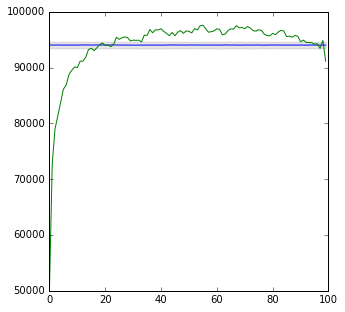

that


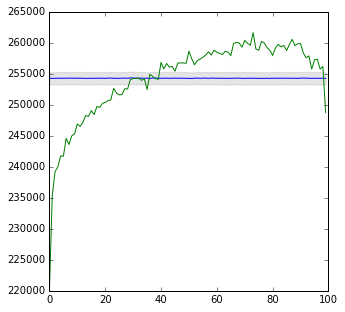

don


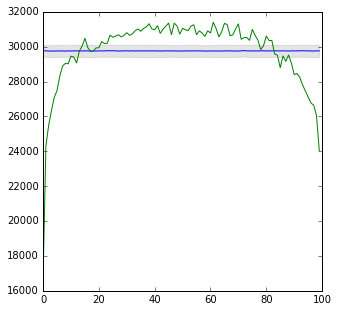

de


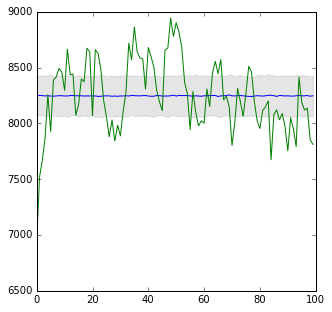

any


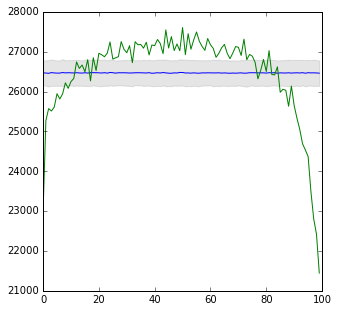

?


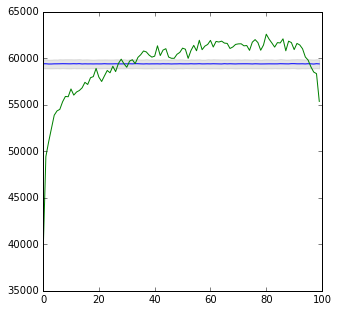

roland


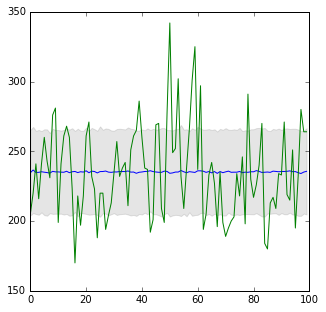

not


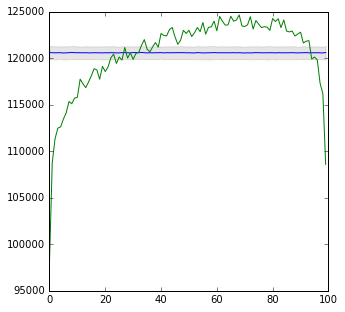

what


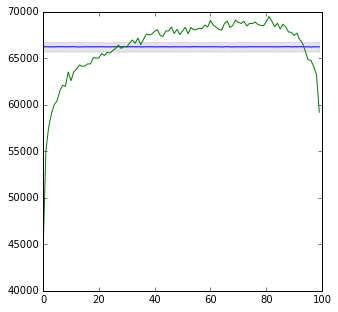

.’


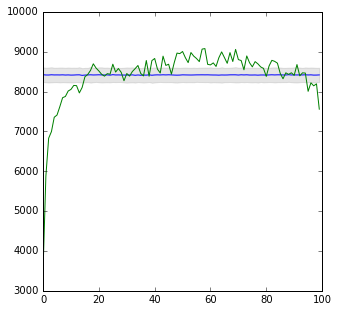

xii


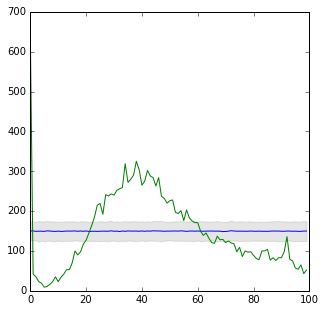

xvii


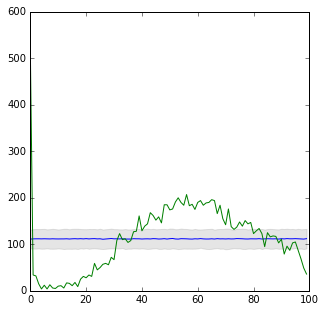

missy


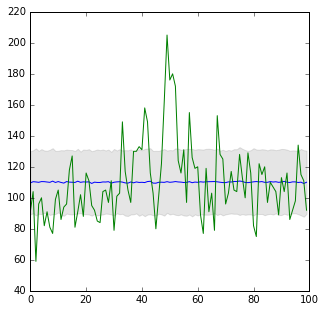

lance


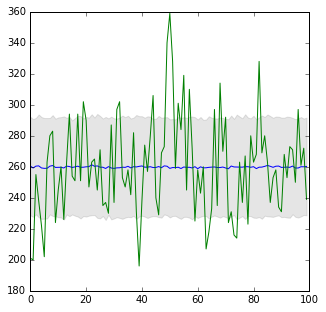

'


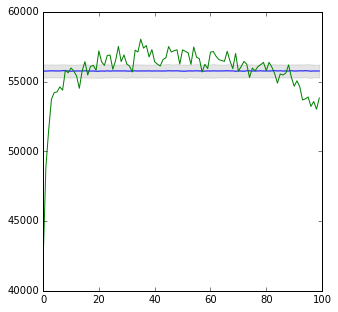

about


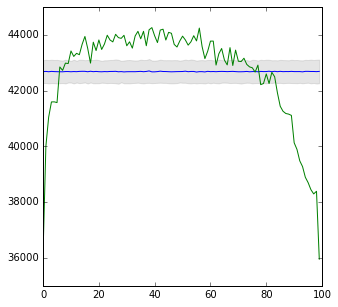

jeff


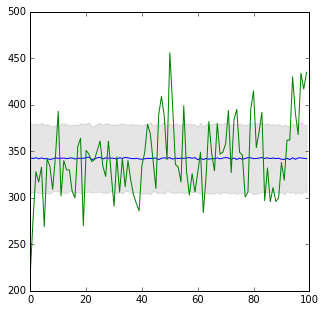

carlo


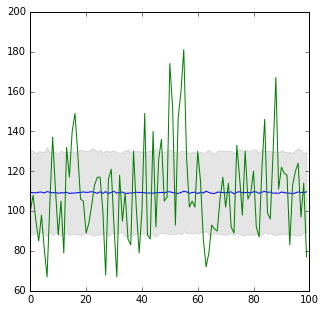

dat


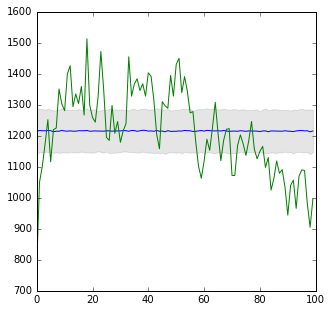

lu


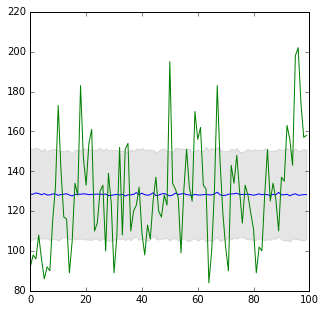

caleb


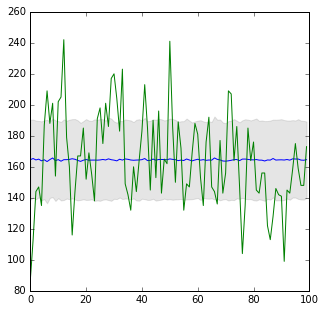

shan


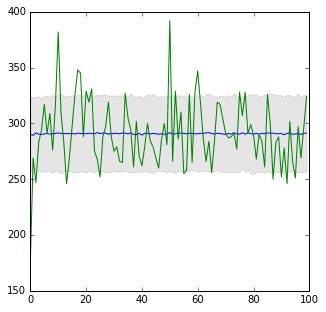

ruth


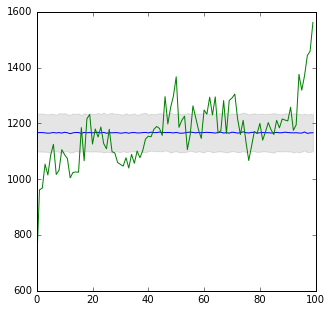

,”


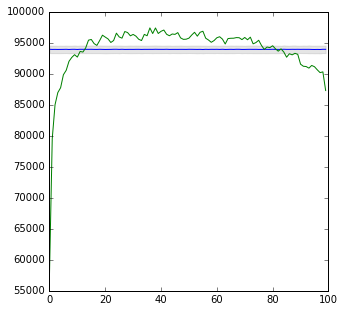

gerald


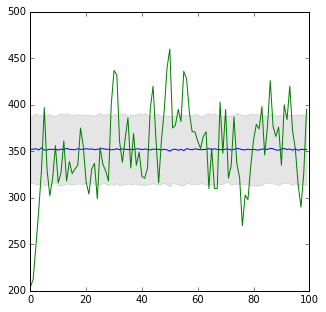

lawrence


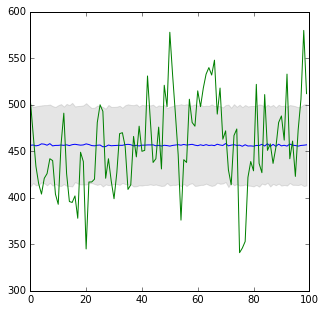

why


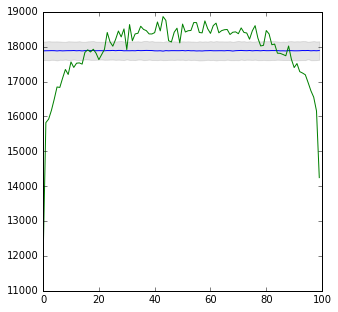

think


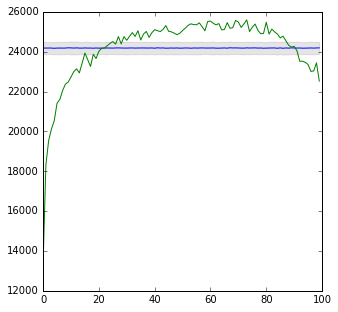

rosie


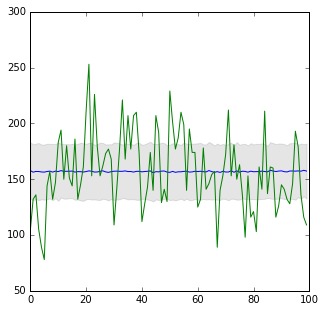

dennis


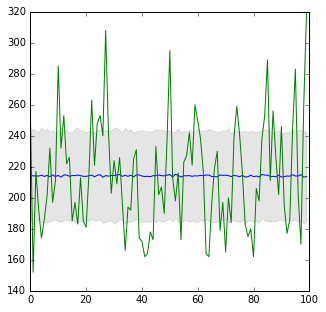

madeline


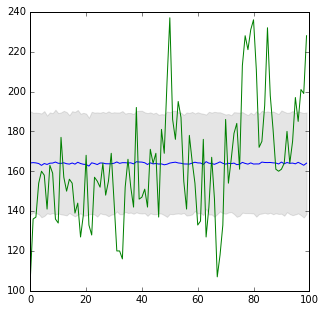

glenn


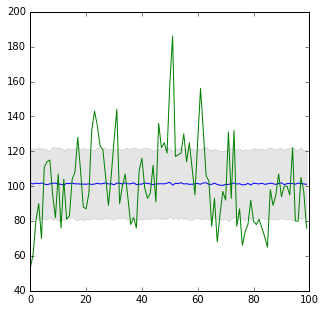

doug


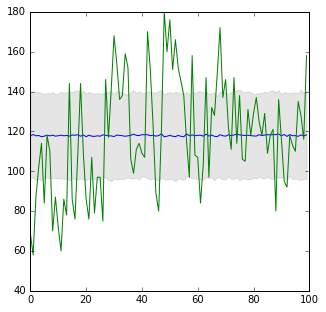

miss


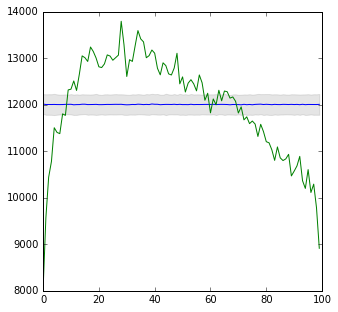

xviii


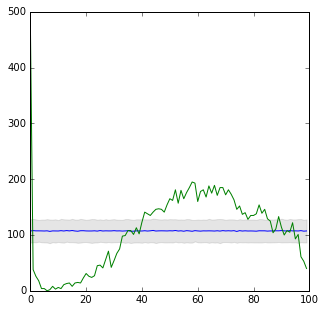

‘


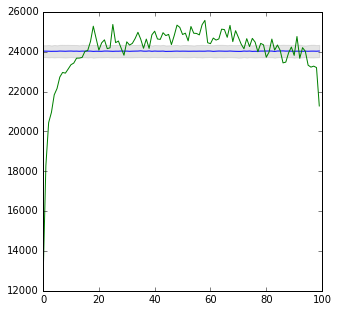

if


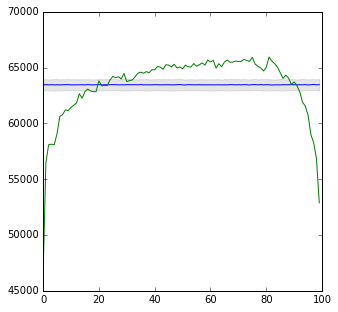

victor


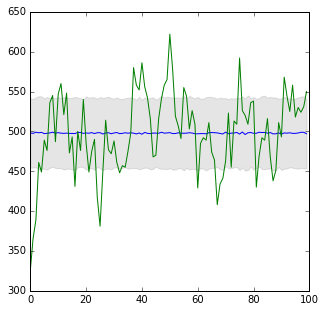

to


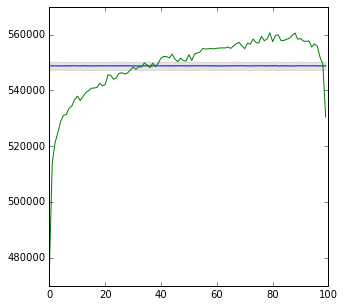

urn


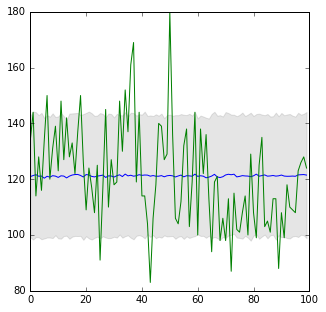

so


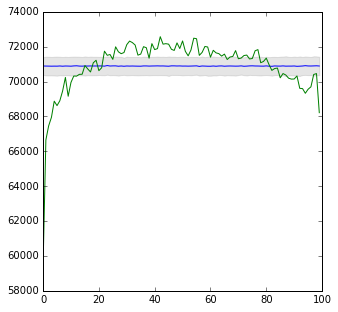

del


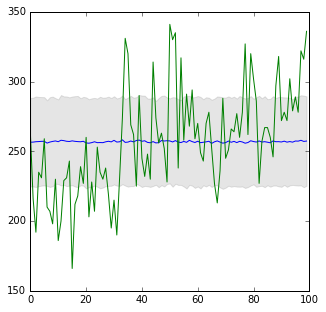

hammond


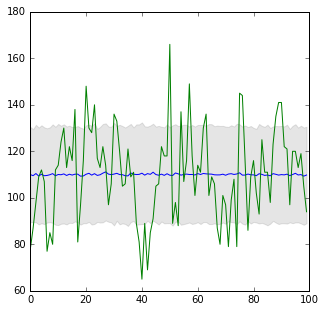

her


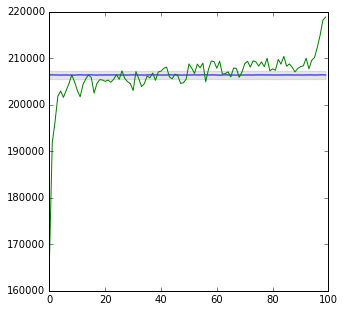

maude


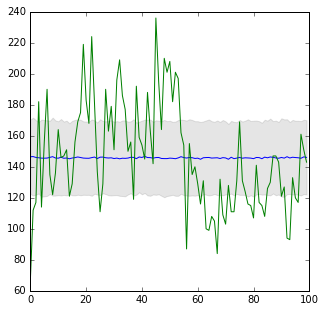

stuart


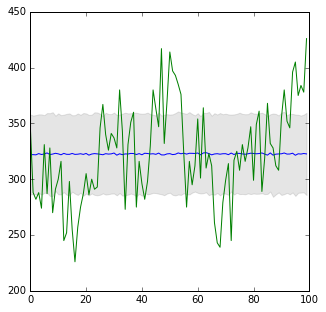

mean


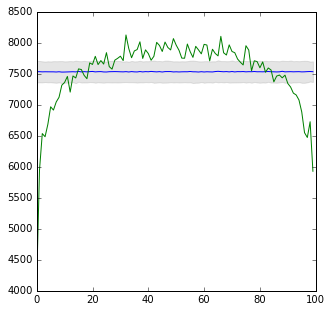

know


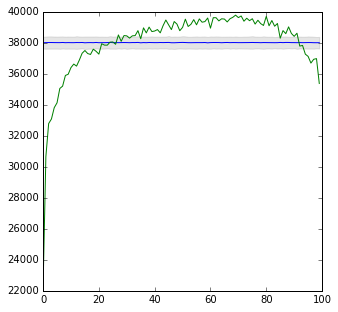

sam


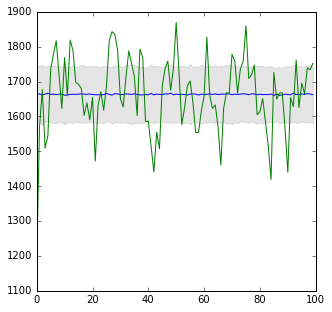

xx


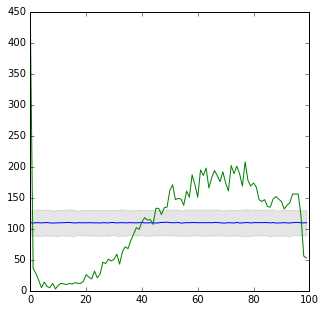

dave


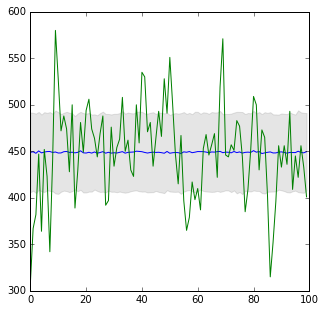

dey


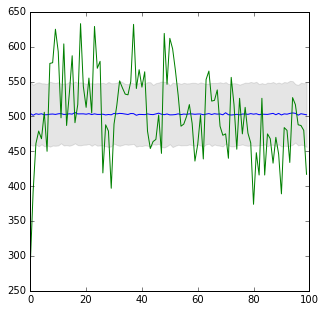

11


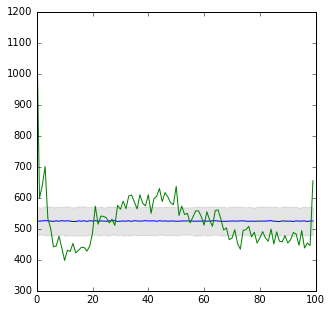

albert


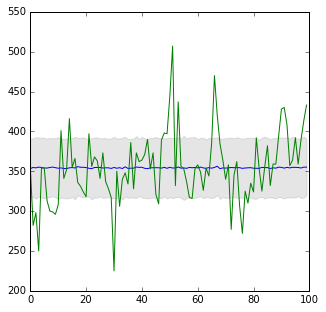

jr


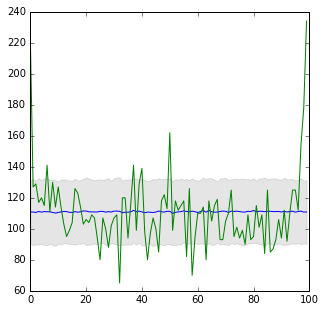

eva


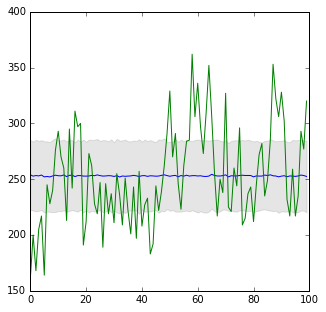

be


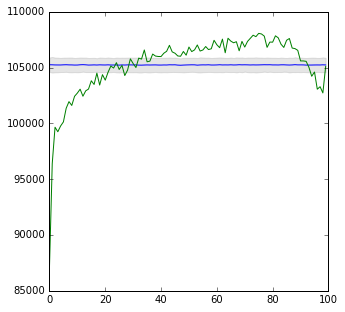

anything


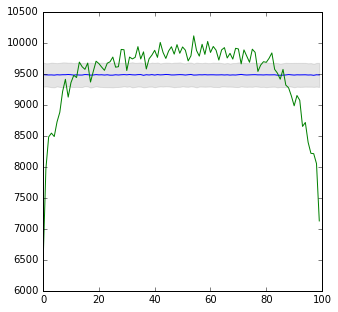

lady


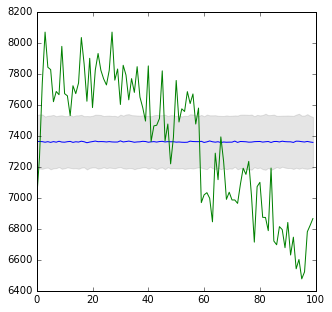

xi


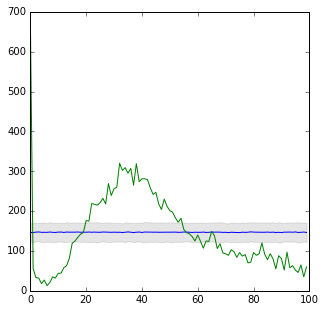

me


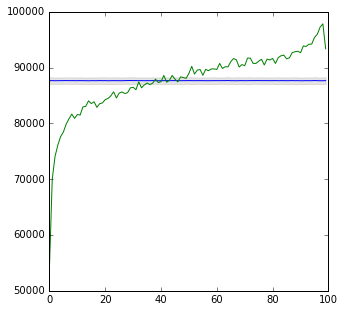

are


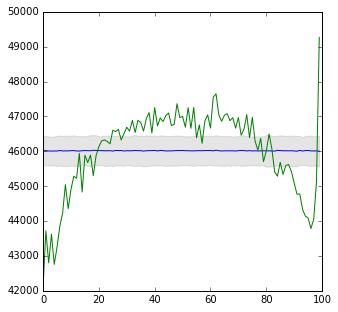

susan


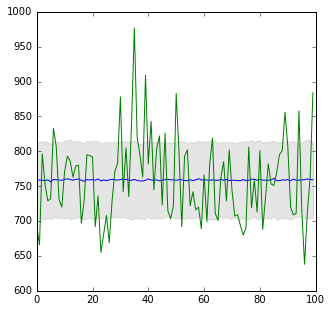

use


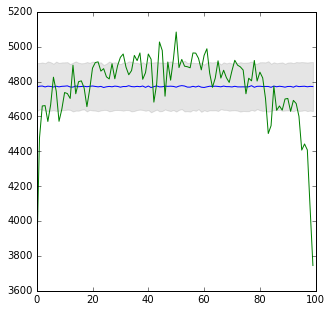

doesn


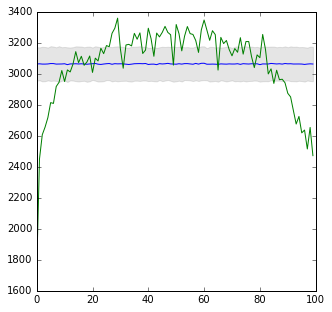

baptism


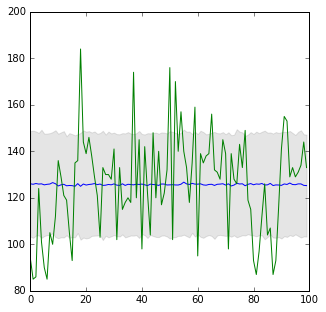

sure


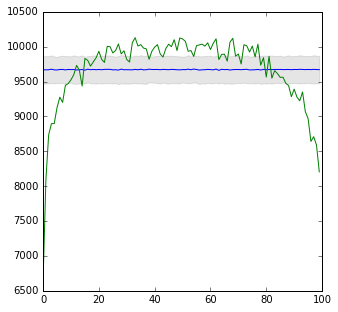

wish


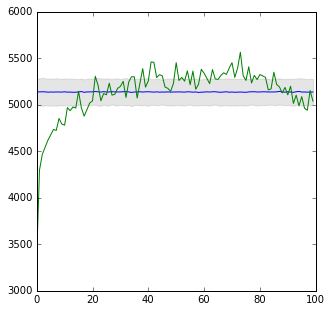

"


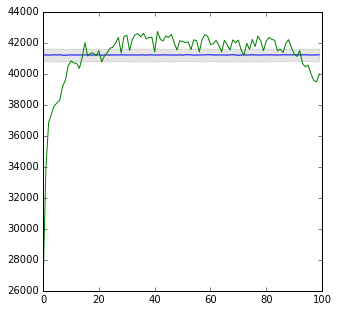

got


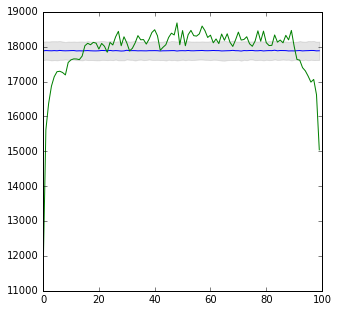

idiot


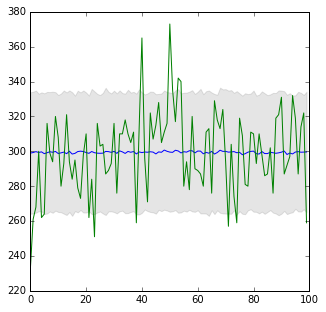

mrs


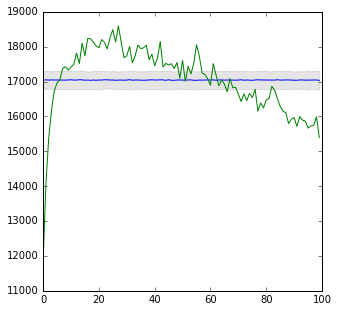

ask


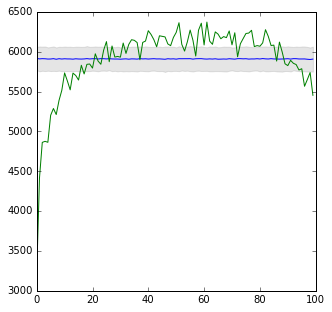

jesse


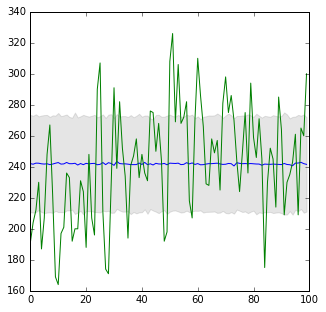

told


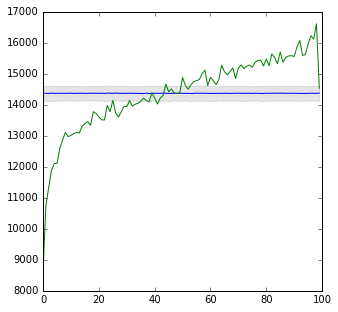

this


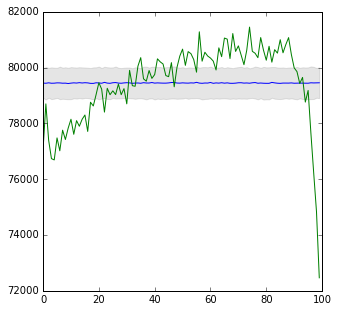

monkey


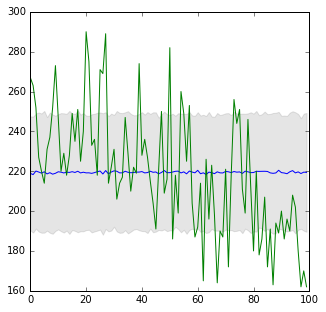

something


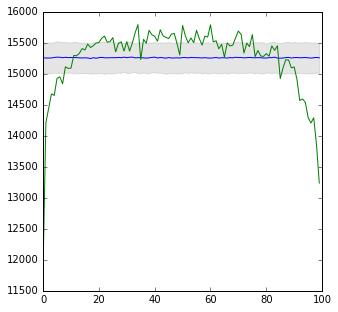

toby


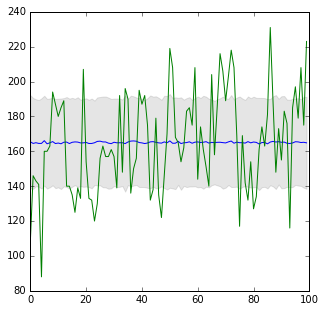

asked


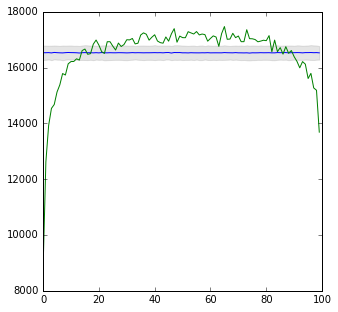

xix


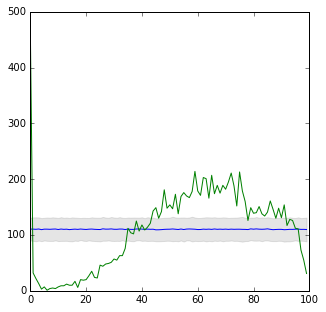

maud


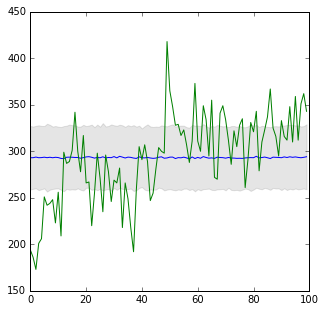

mentioned


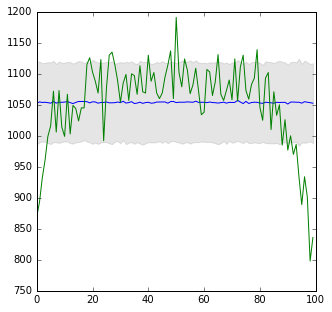

tub


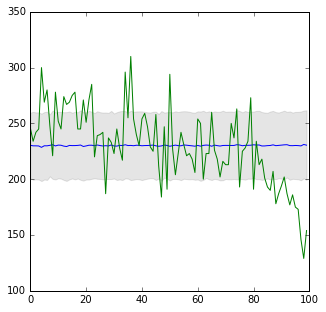

herself


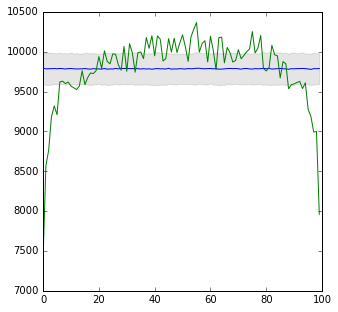

didn


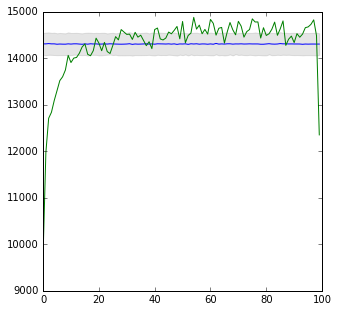

jane


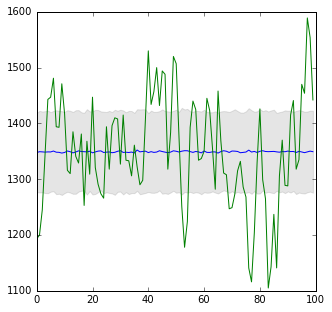

does


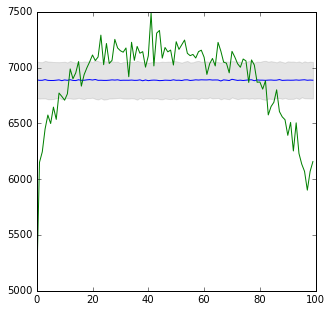

pay


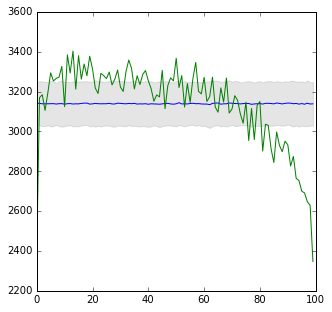

�


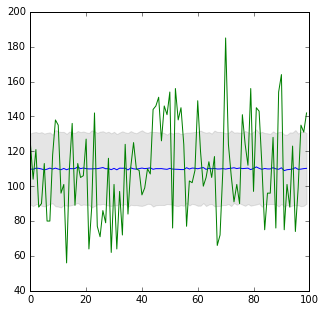

must


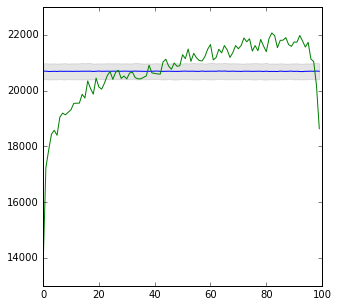

molly


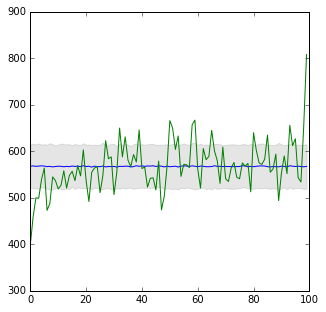

bottle


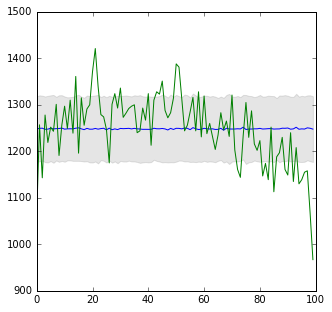

women


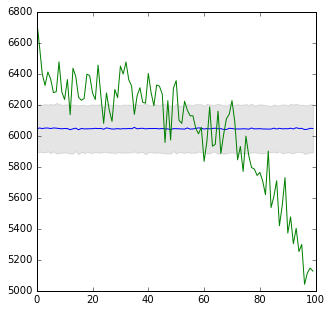

dinah


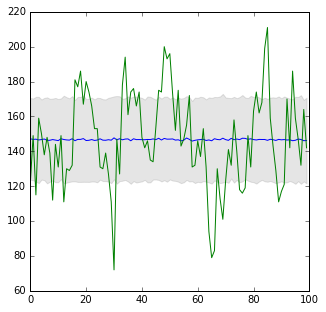

cowboy


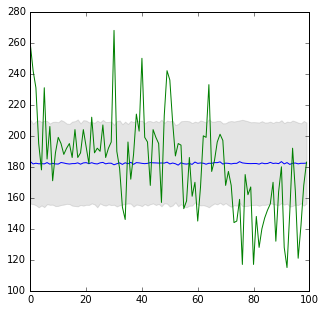

duck


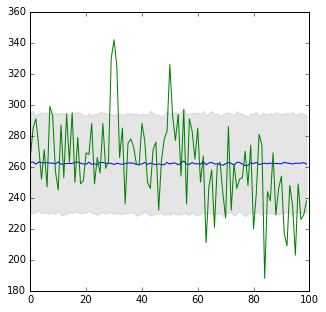

have


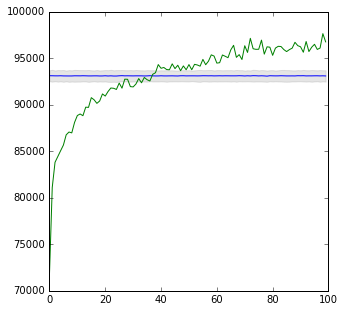

sybil


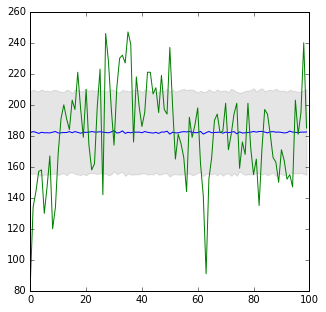

interested


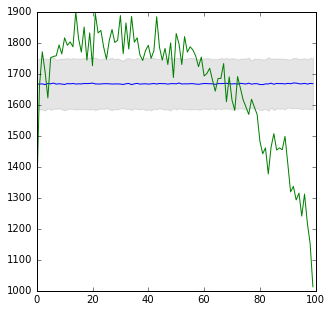

bout


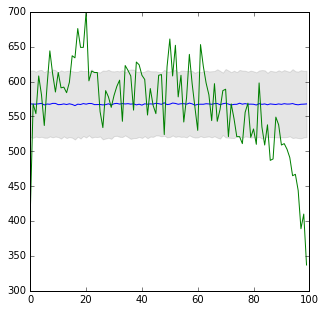

holt


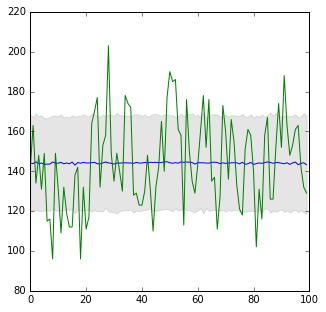

dice


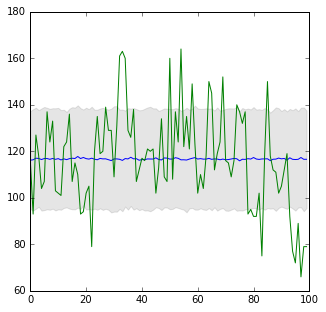

surprised


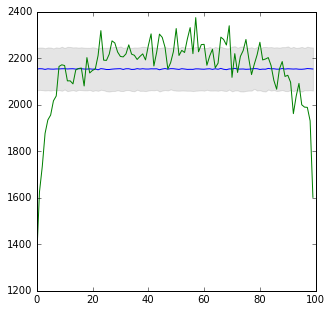

d


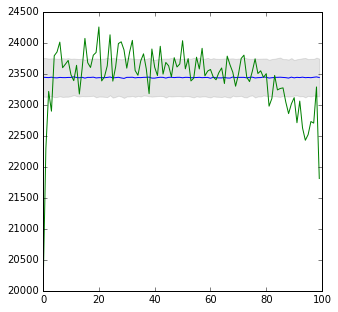

biscuit


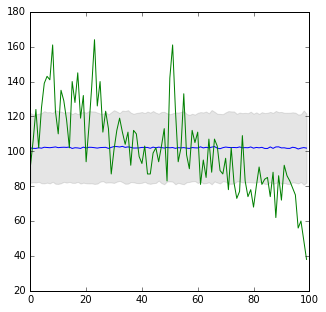

eat


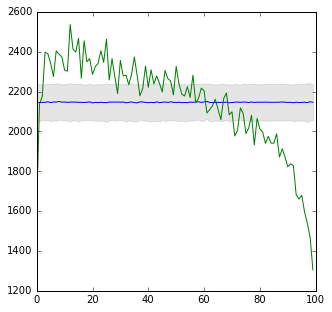

hans


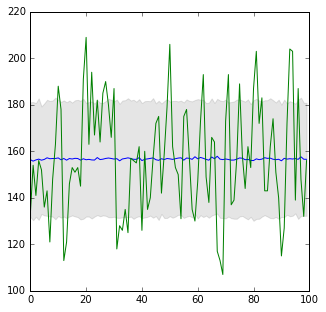

13


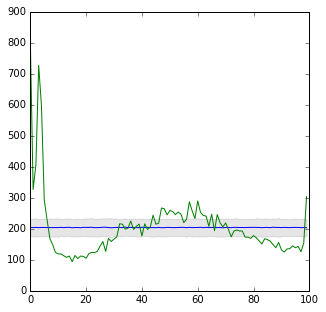

tim


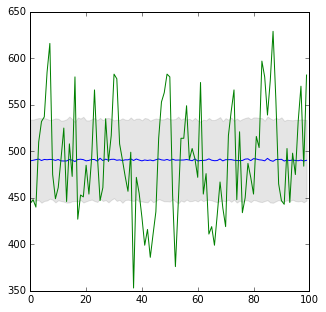

langdon


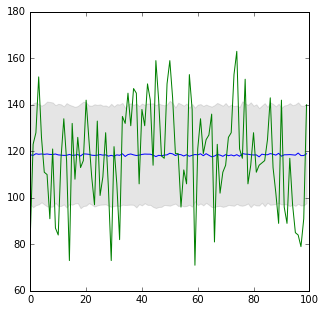

je


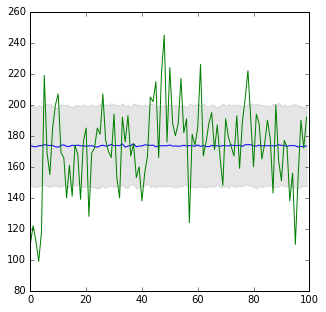

understand


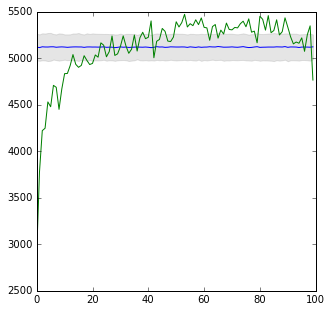

knight


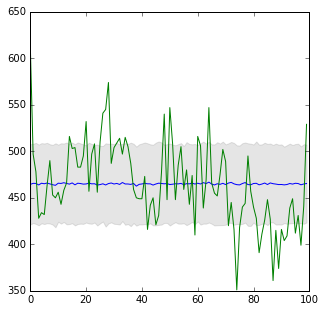

m


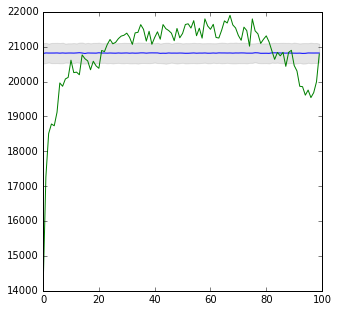

”


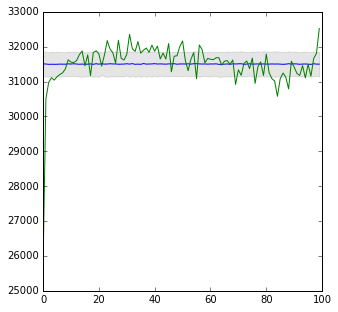

nathan


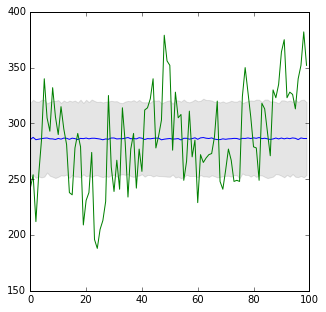

enemy


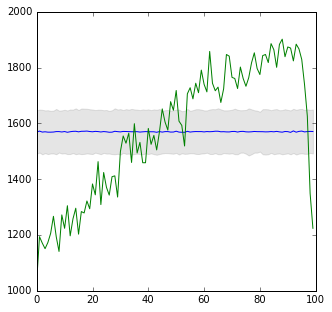

bon


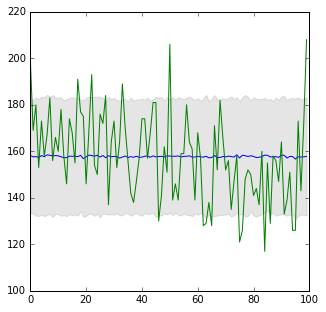

tire


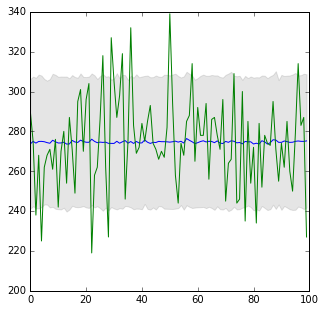

barney


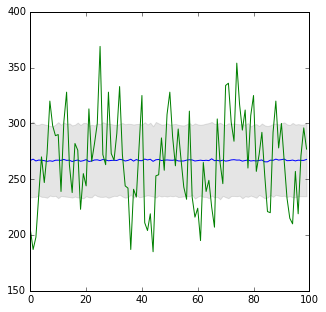

we


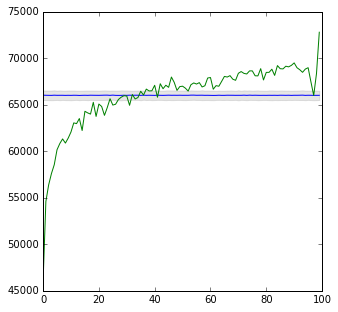

thought


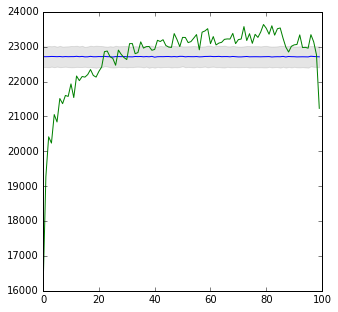

williams


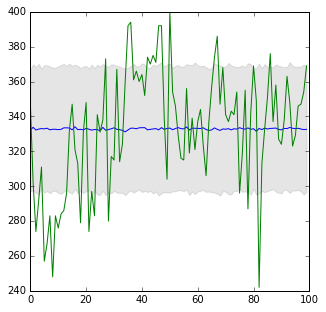

ob


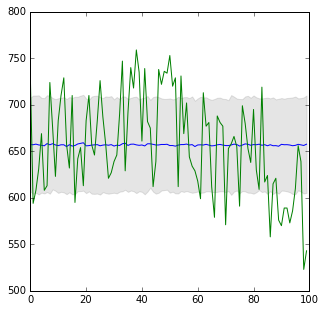

african


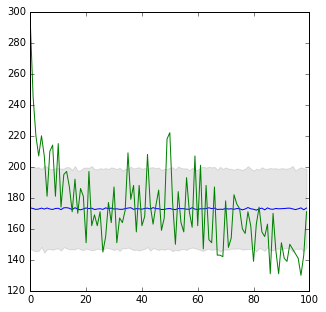

nicholas


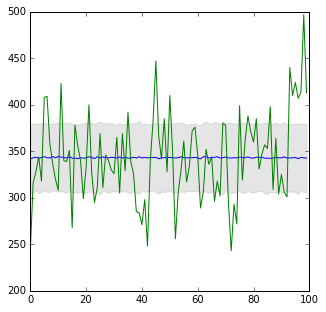

it


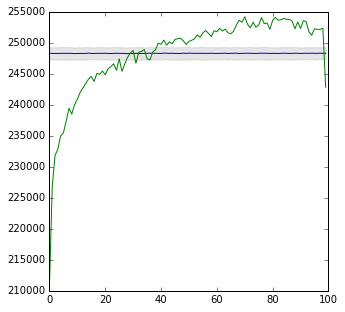

questions


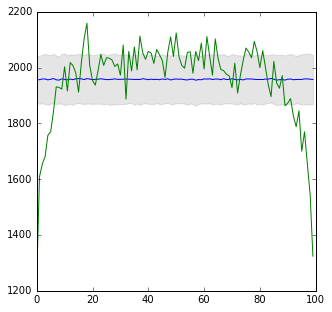

carson


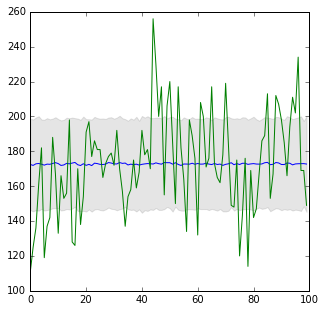

daphne


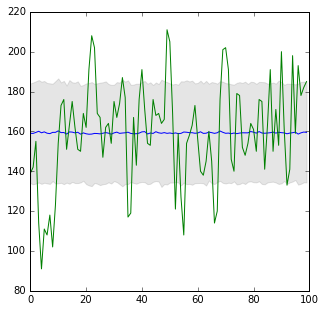

champion


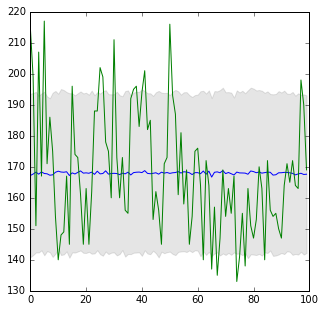

vincent


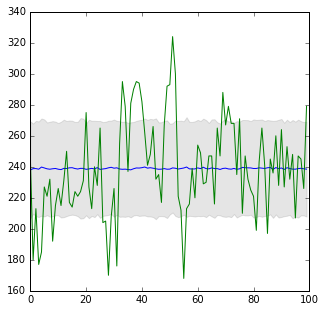

columbus


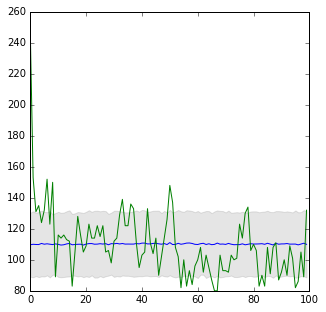

interfere


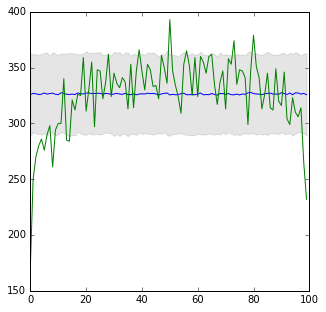

jo


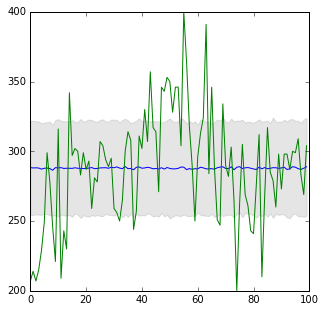

motions


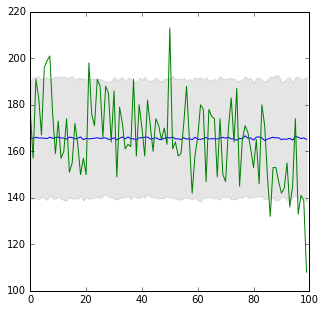

thinking


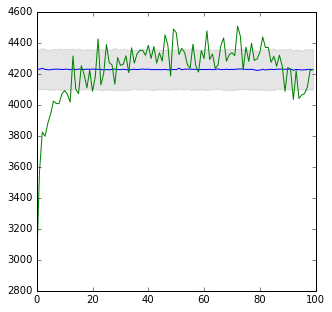

like


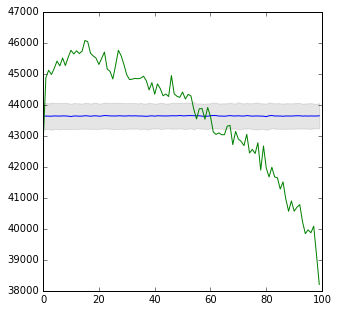

mice


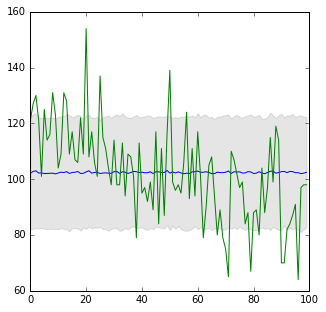

pigeon


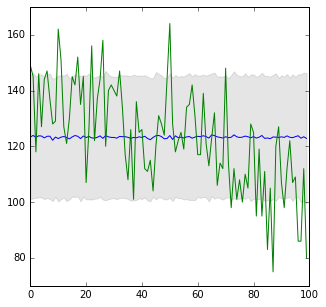

eli


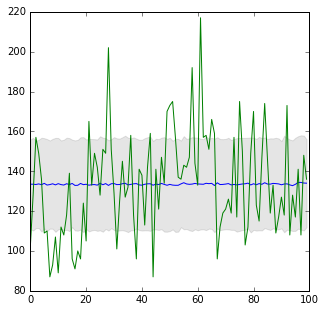

persuaded


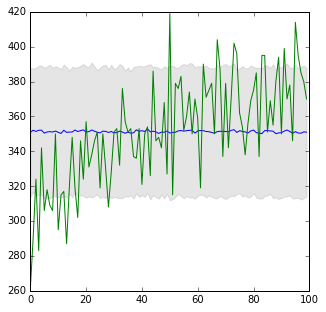

somethin


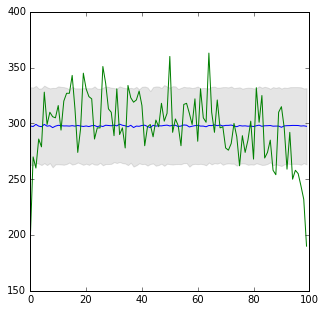

stevens


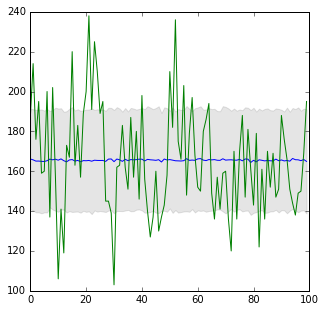

telegram


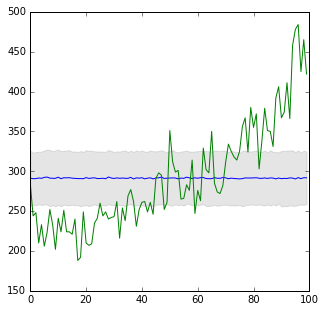

subject


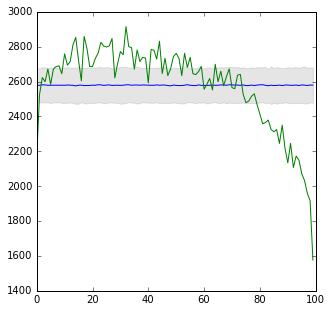

randy


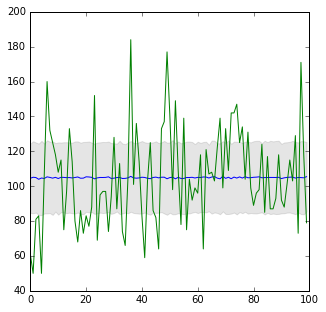

plenty


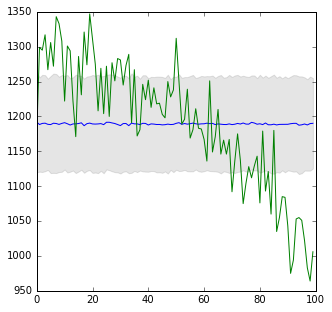

chris


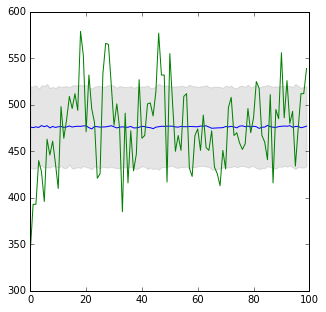

he


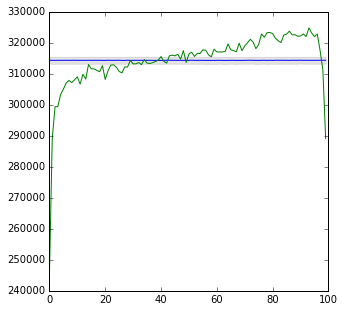

ace


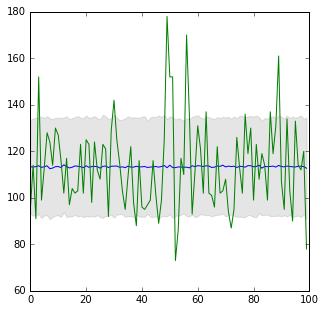

very


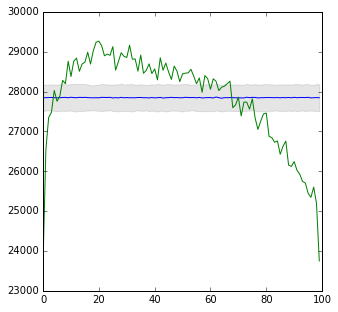

señora


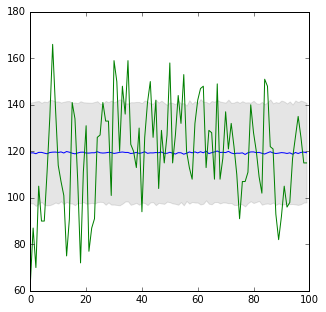

den


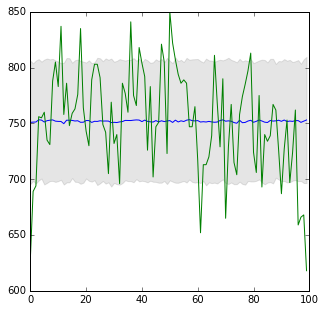

stella


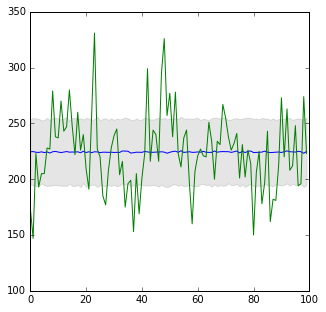

necklace


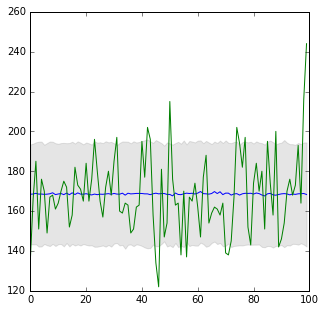

bella


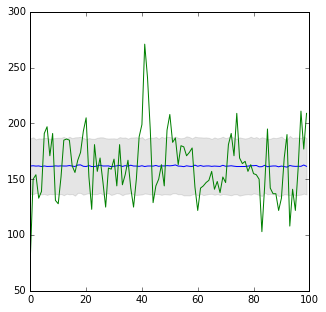

neal


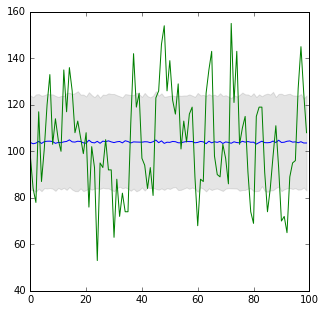

playful


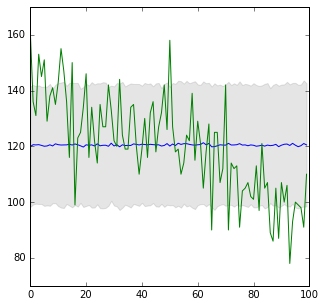

handed


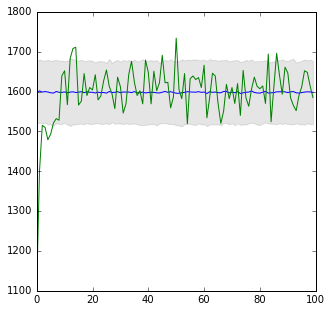

say


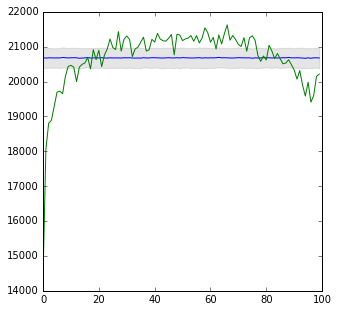

plume


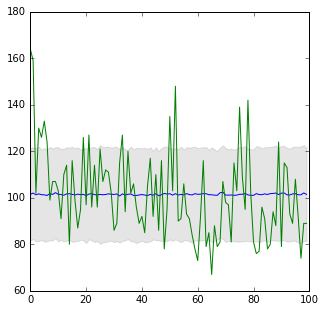

attentions


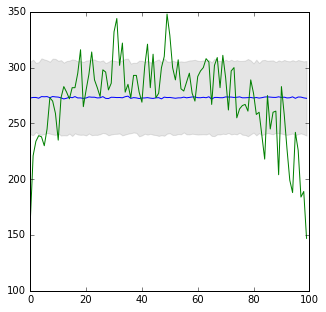

dere


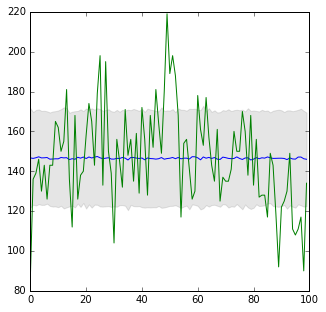

hostess


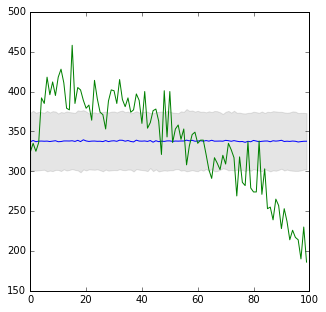

lizzie


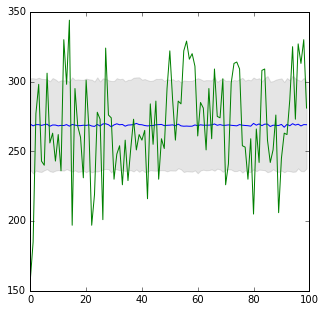

drawers


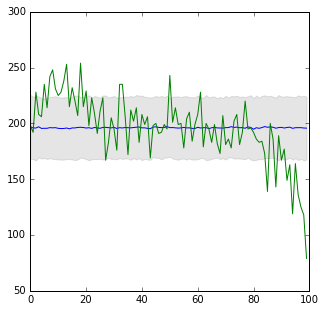

elinor


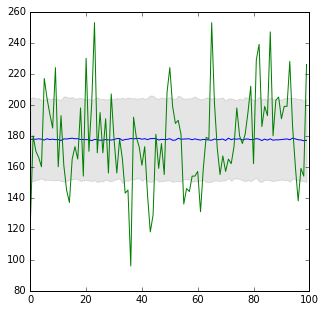

thee


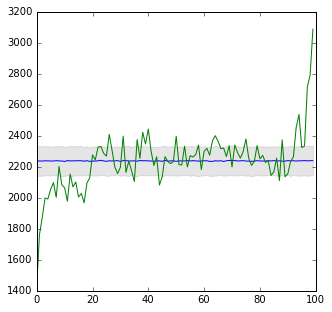

dell


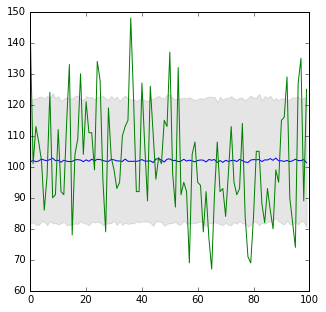

’?


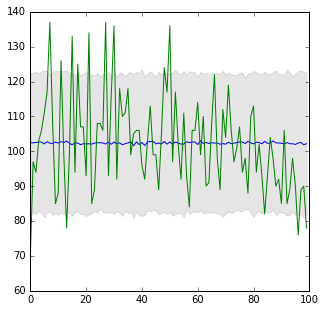

bound


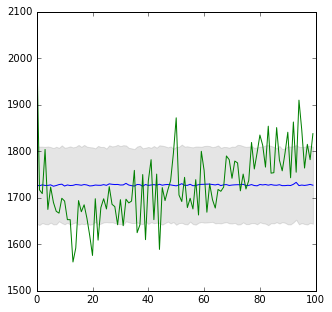

z


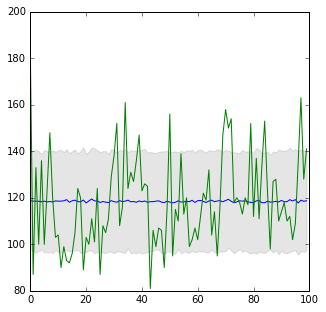

steve


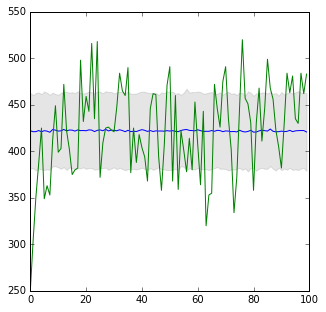

arnold


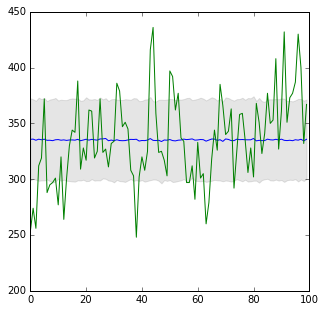

prints


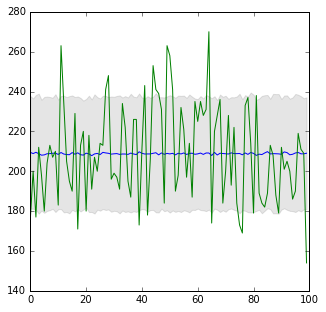

see


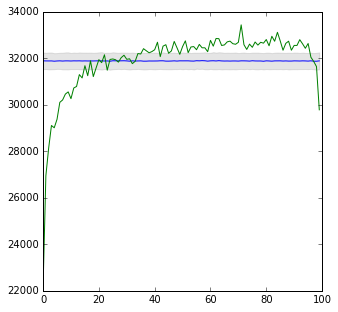

freddy


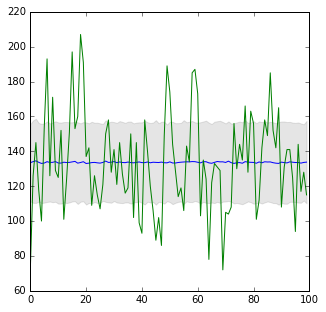

playing


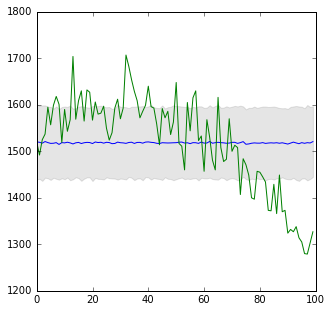

talk


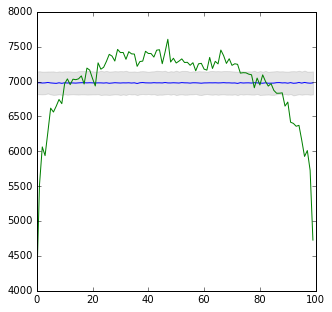

mm


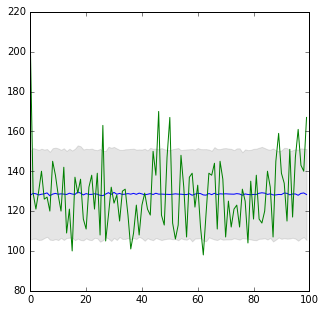

phone


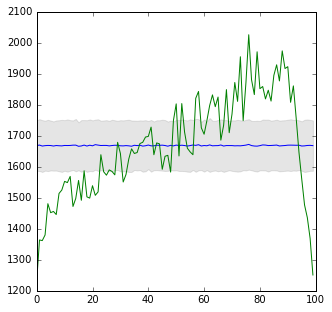

went


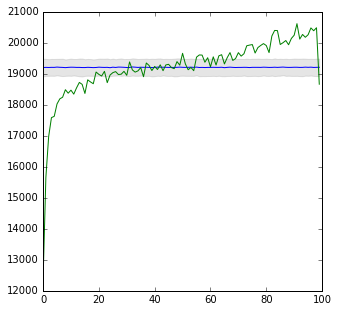

can


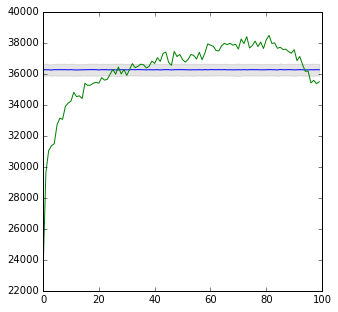

mammy


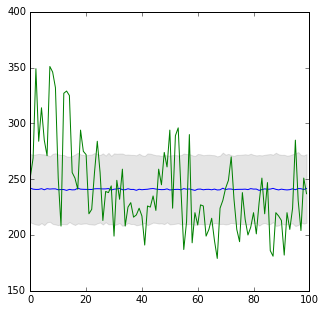

ronald


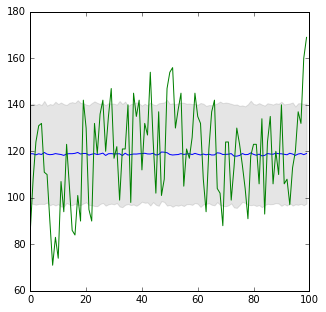

In [75]:
for token in df['token'].head(200):
    plot_bootstrap(token, 5, 5)